In [420]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from pathlib import Path
import pandas as pd
from latex_formater import get_final_answer

save_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/').expanduser()

# load the results and combine them back into a single dataframe
results = pd.concat([
    pd.read_json(save_path / f)
    for f in save_path.iterdir()
    if f.suffix == '.json'
])
results['dataset'].unique()

array(['Counting_and_Probability_train', 'Number_Theory_train',
       'Intermediate_Algebra_train', 'Prealgebra_train',
       'Precalculus_train', 'Geometry_train', 'Algebra_train'],
      dtype=object)

In [421]:
print(f'Loaded {len(results)} results')

results.iloc[0]

Loaded 75000 results


dataset                               Counting_and_Probability_train
i                                                                  0
problem              What is the value of $9^3 + 3(9^2) + 3(9) + 1$?
level                                                        Level 1
type                                          Counting & Probability
solution           The given expression is the expansion of $(9+1...
boxed                                                           1000
model                                                    Llama-2-13b
method                                                autoregressive
prediction          Sure! Here's the calculation:\n\n$9^3 = 9 \ti...
generation_args    {'debug': False, 'seed': None, 'model': 'meta-...
Name: 0, dtype: object

In [8]:
boxed_match_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/BoxedMatch').expanduser()
comet_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/COMET').expanduser()
# roscoe_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/ROSCOE').expanduser()

In [9]:
import pickle

with open(boxed_match_path / 'results.pkl', 'rb') as f:
    boxed_match = pickle.load(f)

with open(comet_path / 'Unbabel_XCOMET-XL.pkl', 'rb') as f:
    xcomet = pickle.load(f)

In [10]:
roscoe_path_a = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/temp').expanduser()

# open all pickle files in the directory
roscoe = {}
for f in roscoe_path_a.iterdir():
    if f.suffix == '.pkl':
        with open(f, 'rb') as file:
            roscoe[f.stem] = pickle.load(file)

roscoe_path_b = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/tempz').expanduser()
for f in roscoe_path_b.iterdir():
    if f.suffix == '.pkl':
        with open(f, 'rb') as file:
            roscoe[f.stem] = pickle.load(file)

In [15]:
results.groupby('dataset').count()

,i,problem,level,type,solution,boxed,model,method,prediction,generation_args,boxed_pred,boxed_true,boxed_match
dataset,,,,,,,,,,,,,
Algebra_train,17440,17440,17440,17440,17440,17440,17440,17440,17174,17440,17440,17440,17440
Counting_and_Probability_train,7710,7710,7710,7710,7710,7710,7710,7710,7611,7710,7710,7710,7710
Geometry_train,8700,8700,8700,8700,8700,8700,8700,8700,8612,8700,8700,8700,8700
Intermediate_Algebra_train,12950,12950,12950,12950,12950,12950,12950,12950,12721,12950,12950,12950,12950
Number_Theory_train,8690,8690,8690,8690,8690,8690,8690,8690,8473,8690,8690,8690,8690
Prealgebra_train,12050,12050,12050,12050,12050,12050,12050,12050,11940,12050,12050,12050,12050
Precalculus_train,7460,7460,7460,7460,7460,7460,7460,7460,7388,7460,7460,7460,7460


In [45]:
roscoe['Algebra_train']['overall']

[]

In [39]:
[(k, len(x)) for k, x in roscoe['Algebra_train'].items()]

[('faithfulness', 17440),
 ('informativeness_step', 17440),
 ('informativeness_chain', 17440),
 ('faithfulness_ww', 17440),
 ('repetition_word', 17440),
 ('repetition_step', 17440),
 ('reasoning_alignment', 17440),
 ('external_hallucination', 17440),
 ('redundancy', 17440),
 ('common_sense_error', 17440),
 ('missing_step', 17440),
 ('semantic_coverage_step', 17440),
 ('semantic_coverage_chain', 17440),
 ('discourse_representation', 17440),
 ('coherence_step_vs_step', 17440),
 ('perplexity_step', 17440),
 ('perplexity_chain', 17440),
 ('perplexity_step_max', 17440),
 ('grammar_step', 17440),
 ('grammar_step_max', 17440),
 ('dataset', 13),
 ('plausibility', 0),
 ('consistency', 0),
 ('relevance', 0),
 ('fluency', 0),
 ('overall', 0)]

In [55]:
# convert roscoe to a dataframe with the dataset as a column
roscoe_df = pd.concat([
    pd.DataFrame({
        'dataset': [dataset] * len(data['faithfulness']),
        **{k: v for k, v in data.items() if len(v) == len(data['faithfulness'])}
    })
    for dataset, data in roscoe.items()
])
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,missing_step,semantic_coverage_step,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,Algebra_train,0.842367,0.871553,0.870473,0.941981,0.008777,0.006053,0.874537,0.946002,0.792711,...,0.852251,0.985191,0.861586,0.324492,0.001267,0.002199,0.163067,0.000026,0.924473,0.393539
1,Algebra_train,0.862160,0.869809,0.872699,0.937304,0.014179,0.013833,0.878105,0.972749,0.843338,...,0.881808,0.995016,0.870605,0.154543,0.005744,0.019903,0.197503,0.011009,0.907267,0.540546
2,Algebra_train,0.859647,0.862789,0.962340,0.932625,0.026098,0.019237,0.869747,0.956343,0.774035,...,0.870916,0.997528,0.948390,0.770996,0.101342,0.014945,0.159617,0.002058,0.960049,0.926857
3,Algebra_train,0.803947,0.846099,0.974254,0.935132,0.076381,0.073243,0.821559,0.911821,0.755224,...,0.837436,0.946772,0.974669,0.810677,0.291581,0.033196,0.085143,0.004104,0.965491,0.932462
4,Algebra_train,0.799119,0.839139,0.971751,0.935354,0.080828,0.104413,0.837002,0.917031,0.760825,...,0.800034,0.941943,0.959444,0.984950,0.986073,0.015735,0.046732,0.005355,0.963304,0.921306


In [68]:
# add ['dataset', 'model', 'i'] from results to roscoe_df
# roscoe_df['model'] = results['model'].values
# roscoe_df['i'] = results['i'].values
# roscoe_df.head()
# the datasets are out of order, so we need to add model, i by matching the dataset name
paired = roscoe_df.groupby('dataset').apply(lambda x: results[results['dataset'] == x.name])

roscoe_df['model'] = paired['model'].values
roscoe_df['i'] = paired['i'].values
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,model,i
0,Algebra_train,0.842367,0.871553,0.870473,0.941981,0.008777,0.006053,0.874537,0.946002,0.792711,...,0.861586,0.324492,0.001267,0.002199,0.163067,0.000026,0.924473,0.393539,Llama-2-13b,0
1,Algebra_train,0.862160,0.869809,0.872699,0.937304,0.014179,0.013833,0.878105,0.972749,0.843338,...,0.870605,0.154543,0.005744,0.019903,0.197503,0.011009,0.907267,0.540546,Deepseek-7b-Instruct,0
2,Algebra_train,0.859647,0.862789,0.962340,0.932625,0.026098,0.019237,0.869747,0.956343,0.774035,...,0.948390,0.770996,0.101342,0.014945,0.159617,0.002058,0.960049,0.926857,Deepseek-67b,0
3,Algebra_train,0.803947,0.846099,0.974254,0.935132,0.076381,0.073243,0.821559,0.911821,0.755224,...,0.974669,0.810677,0.291581,0.033196,0.085143,0.004104,0.965491,0.932462,Meta-Llama-3-8b-Instruct,0
4,Algebra_train,0.799119,0.839139,0.971751,0.935354,0.080828,0.104413,0.837002,0.917031,0.760825,...,0.959444,0.984950,0.986073,0.015735,0.046732,0.005355,0.963304,0.921306,Mistral-7b-Instruct-v0.2,0


In [20]:
# flatten xcomet with xcomet.metadata
xcomet_flat = {}
for key, value in xcomet.items():
    if key == 'metadata':
        continue
    xcomet_flat[key] = value

for key, value in xcomet['metadata'].items():
    xcomet_flat[key] = value

xcomet_flat.keys()

dict_keys(['scores', 'system_score', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores', 'error_spans'])

In [52]:
xcomet_df = pd.DataFrame(xcomet_flat)
xcomet_df.head()

,scores,system_score,src_scores,ref_scores,unified_scores,mqm_scores,error_spans
0,0.169693,0.209593,0.208982,0.268453,0.169774,0.0,"[{'text': 'Sur', 'confidence': 0.2892259657382..."
1,0.077614,0.209593,-0.006511,0.204110,0.033452,0.0,"[{'text': 'breaks', 'confidence': 0.3561324477..."
2,0.157079,0.209593,0.139934,0.259296,0.165817,0.0,"[{'text': 'b', 'confidence': 0.298388421535491..."
3,0.136118,0.209593,0.114540,0.214367,0.156461,0.0,"[{'text': 'pieces', 'confidence': 0.3202254176..."
4,0.176640,0.209593,0.032416,0.325592,0.197892,0.0,"[{'text': 'b', 'confidence': 0.295559883117675..."


In [62]:
results['dataset']

0        Counting_and_Probability_train
1        Counting_and_Probability_train
2        Counting_and_Probability_train
3        Counting_and_Probability_train
4        Counting_and_Probability_train
                      ...              
17435                     Algebra_train
17436                     Algebra_train
17437                     Algebra_train
17438                     Algebra_train
17439                     Algebra_train
Name: dataset, Length: 75000, dtype: object

In [60]:
# add ['dataset', 'model', 'i'] from results to xcomet_df
xcomet_df['dataset'] = results['dataset'].values
xcomet_df['model'] = results['model'].values
xcomet_df['i'] = results['i'].values
xcomet_df.head()

,scores,system_score,src_scores,ref_scores,unified_scores,mqm_scores,error_spans,dataset,model,i
0,0.169693,0.209593,0.208982,0.268453,0.169774,0.0,"[{'text': 'Sur', 'confidence': 0.2892259657382...",Counting_and_Probability_train,Llama-2-13b,0
1,0.077614,0.209593,-0.006511,0.204110,0.033452,0.0,"[{'text': 'breaks', 'confidence': 0.3561324477...",Counting_and_Probability_train,Deepseek-7b-Instruct,0
2,0.157079,0.209593,0.139934,0.259296,0.165817,0.0,"[{'text': 'b', 'confidence': 0.298388421535491...",Counting_and_Probability_train,Deepseek-67b,0
3,0.136118,0.209593,0.114540,0.214367,0.156461,0.0,"[{'text': 'pieces', 'confidence': 0.3202254176...",Counting_and_Probability_train,Meta-Llama-3-8b-Instruct,0
4,0.176640,0.209593,0.032416,0.325592,0.197892,0.0,"[{'text': 'b', 'confidence': 0.295559883117675...",Counting_and_Probability_train,Mistral-7b-Instruct-v0.2,0


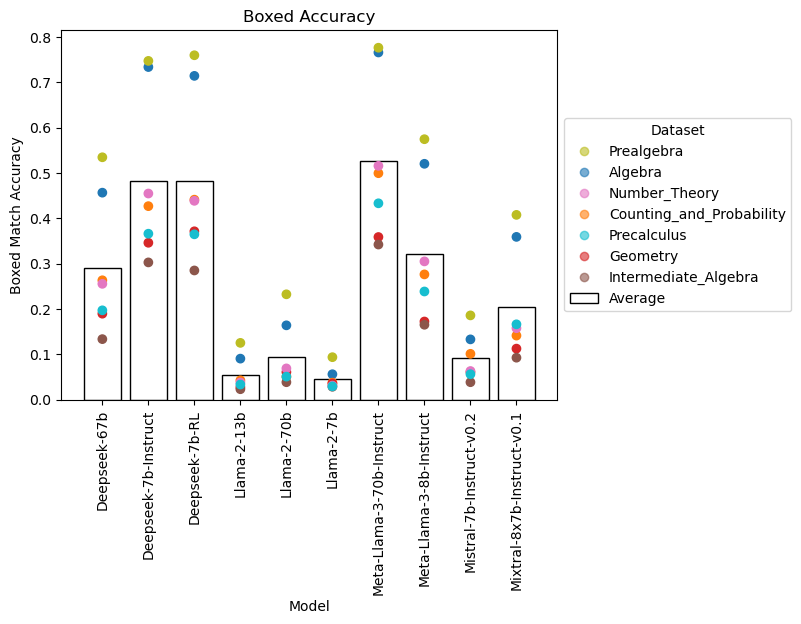

In [73]:
# plot the results
import matplotlib.pyplot as plt

boxed_accuracy = boxed_match.groupby(['model', 'dataset'])['boxed_match'].mean()
model_accuracy = boxed_accuracy.groupby('model').mean()
dataset_accuracy = boxed_accuracy.groupby('dataset').mean()

plt.bar(model_accuracy.index, model_accuracy, edgecolor='black', linewidth=1, color='none')

# plot each dataset as a separate point with model on the x axis and boxed_match on the y axis
colors = pd.Categorical(boxed_accuracy.index.get_level_values('dataset'))
scatter = plt.scatter(boxed_accuracy.index.get_level_values('model'), boxed_accuracy, c=colors.codes, cmap='tab10')
plt.xlabel('Model')
plt.ylabel('Boxed Match Accuracy')
plt.title('Boxed Accuracy')
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

# sort the legend by the average accuracy
sorted_idxs = dataset_accuracy.sort_values(ascending=False).index
handles = [handles[colors.categories.get_loc(dataset)] for dataset in sorted_idxs]
labels = [labels[colors.categories.get_loc(dataset)] for dataset in sorted_idxs]

# add bars to the legend
handles.append(plt.Rectangle((0, 0), 1, 1, fc='none', edgecolor='black'))
labels.append('Average')

plt.legend(
    handles, labels,
    title='Dataset',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.xticks(rotation=90)

plt.show()

In [75]:
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,model,i
0,Algebra_train,0.842367,0.871553,0.870473,0.941981,0.008777,0.006053,0.874537,0.946002,0.792711,...,0.861586,0.324492,0.001267,0.002199,0.163067,0.000026,0.924473,0.393539,Llama-2-13b,0
1,Algebra_train,0.862160,0.869809,0.872699,0.937304,0.014179,0.013833,0.878105,0.972749,0.843338,...,0.870605,0.154543,0.005744,0.019903,0.197503,0.011009,0.907267,0.540546,Deepseek-7b-Instruct,0
2,Algebra_train,0.859647,0.862789,0.962340,0.932625,0.026098,0.019237,0.869747,0.956343,0.774035,...,0.948390,0.770996,0.101342,0.014945,0.159617,0.002058,0.960049,0.926857,Deepseek-67b,0
3,Algebra_train,0.803947,0.846099,0.974254,0.935132,0.076381,0.073243,0.821559,0.911821,0.755224,...,0.974669,0.810677,0.291581,0.033196,0.085143,0.004104,0.965491,0.932462,Meta-Llama-3-8b-Instruct,0
4,Algebra_train,0.799119,0.839139,0.971751,0.935354,0.080828,0.104413,0.837002,0.917031,0.760825,...,0.959444,0.984950,0.986073,0.015735,0.046732,0.005355,0.963304,0.921306,Mistral-7b-Instruct-v0.2,0


In [174]:
from roscoe.score import (
    ROSCOE_SA,
    ROSCOE_SS,
    ROSCOE_LI,
    ROSCOE_LC,
    REASONING_SCORES,
    SUPERVISED_SCORES,
    UNSUPERVISED_SCORES,
)


def aggregate_roscoe_scores(roscoe_df):
    roscoe_df['ROSCOE_SA'] = roscoe_df[ROSCOE_SA].mean(axis=1)
    roscoe_df['ROSCOE_SS'] = roscoe_df[ROSCOE_SS].mean(axis=1)
    roscoe_df['ROSCOE_LI'] = roscoe_df[ROSCOE_LI].mean(axis=1)
    roscoe_df['ROSCOE_LC'] = roscoe_df[ROSCOE_LC].mean(axis=1)
    roscoe_df['ROSCOE'] = roscoe_df[REASONING_SCORES].mean(axis=1)
    roscoe_df['ROSCOE_supervised'] = roscoe_df[SUPERVISED_SCORES].mean(axis=1)
    roscoe_df['ROSCOE_unsupervised'] = roscoe_df[UNSUPERVISED_SCORES].mean(axis=1)

    return roscoe_df


roscoe_df = aggregate_roscoe_scores(roscoe_df)
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,grammar_step_max,model,i,ROSCOE_SA,ROSCOE_SS,ROSCOE_LI,ROSCOE_LC,ROSCOE,ROSCOE_supervised,ROSCOE_unsupervised
0,Algebra_train,0.842367,0.871553,0.870473,0.941981,0.008777,0.006053,0.874537,0.946002,0.792711,...,0.393539,Llama-2-13b,0,0.809141,0.579371,0.162879,0.296661,0.581929,0.898332,0.411559
1,Algebra_train,0.862160,0.869809,0.872699,0.937304,0.014179,0.013833,0.878105,0.972749,0.843338,...,0.540546,Deepseek-7b-Instruct,0,0.823552,0.585713,0.080143,0.335246,0.591458,0.917524,0.415885
2,Algebra_train,0.859647,0.862789,0.962340,0.932625,0.026098,0.019237,0.869747,0.956343,0.774035,...,0.926857,Deepseek-67b,0,0.813087,0.643322,0.436169,0.412705,0.649835,0.914015,0.507585
3,Algebra_train,0.803947,0.846099,0.974254,0.935132,0.076381,0.073243,0.821559,0.911821,0.755224,...,0.932462,Meta-Llama-3-8b-Instruct,0,0.790208,0.674055,0.551129,0.404079,0.652345,0.887884,0.525516
4,Algebra_train,0.799119,0.839139,0.971751,0.935354,0.080828,0.104413,0.837002,0.917031,0.760825,...,0.921306,Mistral-7b-Instruct-v0.2,0,0.787155,0.678536,0.985511,0.390486,0.691531,0.882365,0.588774


/tmp/user/21882/ipykernel_3595343/3023343695.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/tmp/user/21882/ipykernel_3595343/3023343695.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/tmp/user/21882/ipykernel_3595343/3023343695.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


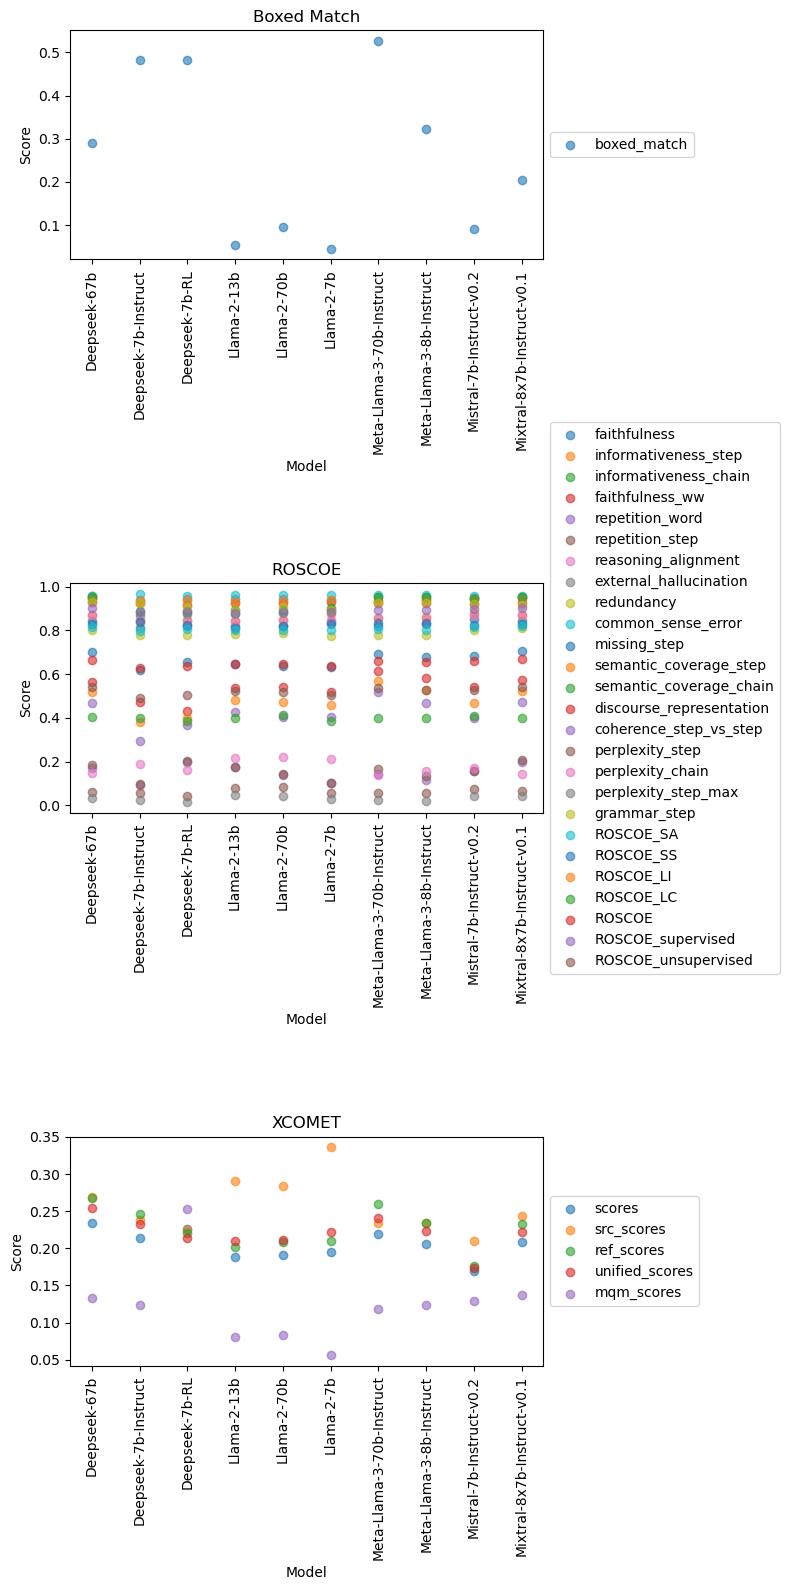

In [178]:
# plot metrics
import matplotlib.pyplot as plt

# group by model
boxed_match_grouped = boxed_match.groupby(['model', 'dataset'])[['boxed_match']].mean()
roscoe_grouped = roscoe_df.groupby(['model', 'dataset'])[
    ['faithfulness', 'informativeness_step',
     'informativeness_chain', 'faithfulness_ww', 'repetition_word',
     'repetition_step', 'reasoning_alignment', 'external_hallucination',
     'redundancy', 'common_sense_error', 'missing_step',
     'semantic_coverage_step', 'semantic_coverage_chain',
     'discourse_representation', 'coherence_step_vs_step', 'perplexity_step',
     'perplexity_chain', 'perplexity_step_max', 'grammar_step',
     'ROSCOE_SA', 'ROSCOE_SS', 'ROSCOE_LI', 'ROSCOE_LC',
     'ROSCOE', 'ROSCOE_supervised', 'ROSCOE_unsupervised']
].mean()
xcomet_grouped = xcomet_df.groupby(['model', 'dataset'])[
    ['scores', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores']].mean()

# plot the metrics
fig, ax = plt.subplots(3, 1, figsize=(8, 16))

for i, (grouped, title) in enumerate(
        zip([boxed_match_grouped, roscoe_grouped, xcomet_grouped], ['Boxed Match', 'ROSCOE', 'XCOMET'])):
    grouped = grouped.groupby('model').mean()
    for metric in grouped.columns:
        ax[i].scatter(grouped.index, grouped[metric], label=metric, alpha=0.6)

    ax[i].set_xlabel('Model')
    ax[i].set_ylabel('Score')
    ax[i].set_title(title)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [169]:
# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_model(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                   title=None):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric2.index)
    scatter = ax.scatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6)

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

    plt.legend(
        handles, labels,
        title='Model',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()


# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_dataset(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                     title=None):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric2.index)
    scatter = ax.scatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6)

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

    plt.legend(
        handles, labels,
        title='Dataset',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()


# https://github.com/matplotlib/matplotlib/issues/11155
def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax = plt.gca()
    sc = ax.scatter(x, y, **kw)
    if (m is not None) and (len(m) == len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_model_and_dataset(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                               title=None):
    # set color by model
    # set marker shape by dataset
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric1.index.get_level_values('dataset'))
    markers = pd.Categorical(metric1.index.get_level_values('model'))
    marker_map = {
        0: 'o',
        1: 's',
        2: 'D',
        3: '^',
        4: 'p',
        5: 'P',
        6: '*',
        7: 'x',
        8: '1',
        9: 'h',
        10: '3',
        11: '+',
        12: 'd',
        13: '|',
        14: '_',
        15: '<',
    }
    scatter = mscatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6,
                       m=[marker_map[marker] for marker in markers.codes])

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles_c, labels_c = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels_c = [colors.categories[int(label)].replace('_train', '') for label in labels_c]

    handles_m = [plt.scatter([], [], marker=marker, color='black', label=marker) for marker in marker_map.values()]
    labels_m = [label.replace('_train', '') for label in markers.categories]

    handles = handles_c + handles_m
    labels = labels_c + labels_m

    plt.legend(
        handles, labels,
        title='Model',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()

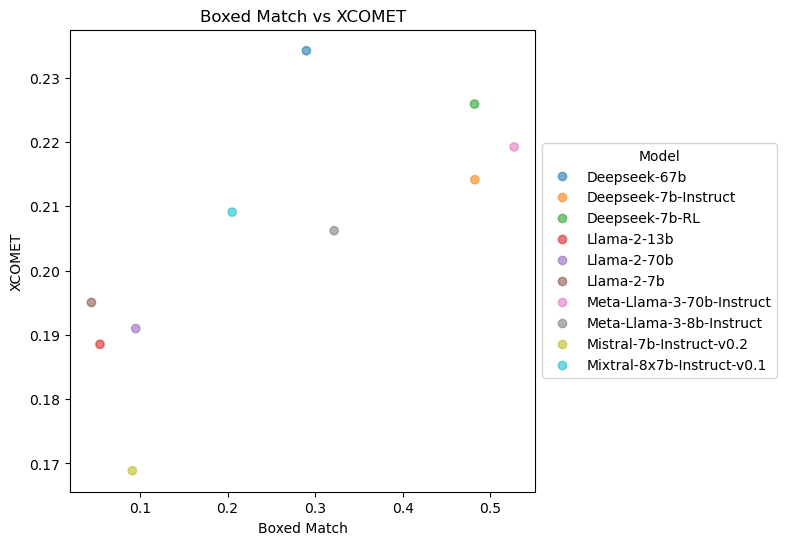

In [132]:
plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
                               xcomet_grouped.groupby('model').mean()['scores'], 'Boxed Match', 'XCOMET')

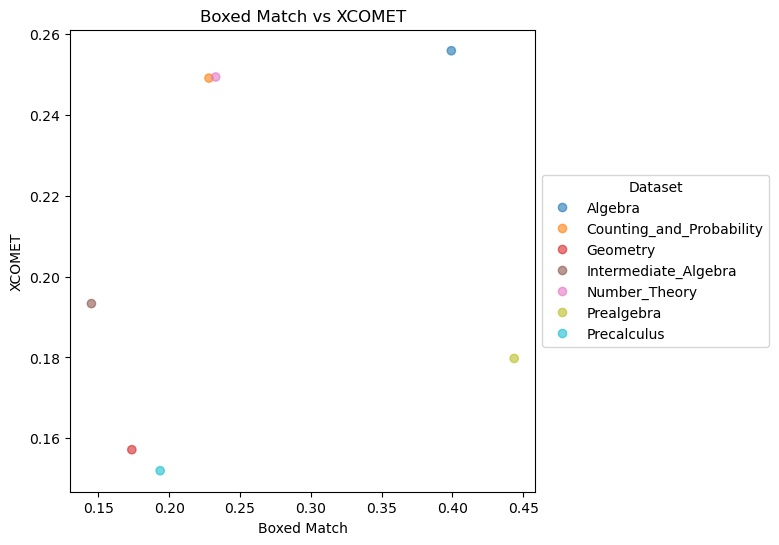

In [133]:
plot_metric_vs_metric_by_dataset(boxed_match_grouped.groupby('dataset').mean()['boxed_match'],
                                 xcomet_grouped.groupby('dataset').mean()['scores'], 'Boxed Match', 'XCOMET')

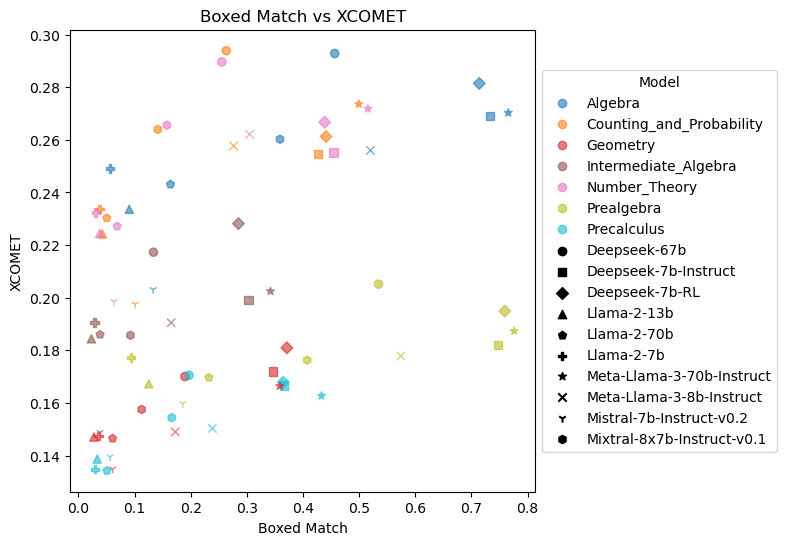

In [213]:
# 'scores', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores'
m = 'scores'

plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], xcomet_grouped[m], 'Boxed Match',
                                           'XCOMET')

In [411]:
# calculation correlation between boxed_match and xcomet for each dataset
corrs = {}
for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
    boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset}"')['boxed_match']

    # print(f'{dataset}:')
    # for m in roscoe_grouped.columns:
    #     roscoe_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')[m]
    #     correlation = boxed_match_dataset.corr(roscoe_dataset)
    #     corrs[m] = corrs.get(m, []) + [correlation]
    #     # print(f'{dataset} {m}:\n{correlation:.3f}')
    #     print(f'{correlation:.3f}, ', end='')
    # print()
    xcomet_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')['ROSCOE_aggregated']

    correlation = boxed_match_dataset.corr(xcomet_dataset)
    # corrs.append(correlation)
    print(f'{dataset}:\n{correlation:.3f}')

# print(f'Averages:')
# for m, c in corrs.items():
#     print(f'{m}: {sum(c) / len(c):.3f}')

Algebra_train:
0.865
Counting_and_Probability_train:
0.791
Geometry_train:
0.673
Intermediate_Algebra_train:
0.842
Number_Theory_train:
0.799
Prealgebra_train:
0.936
Precalculus_train:
0.585


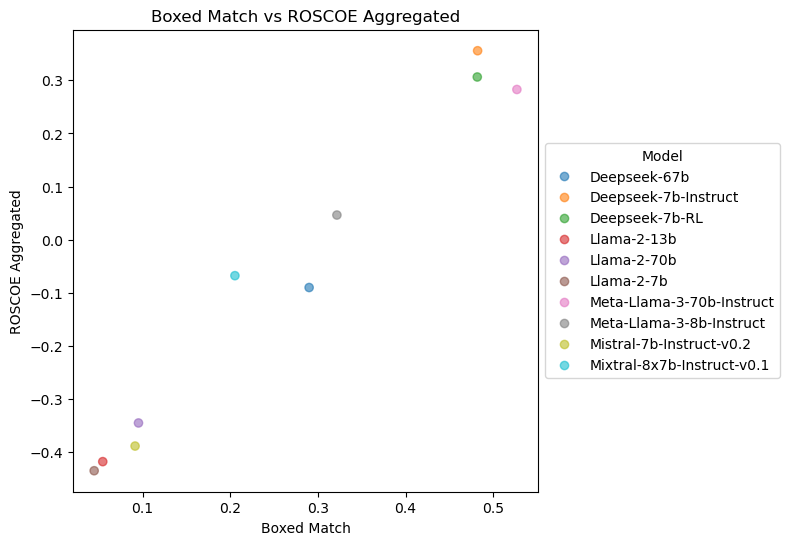

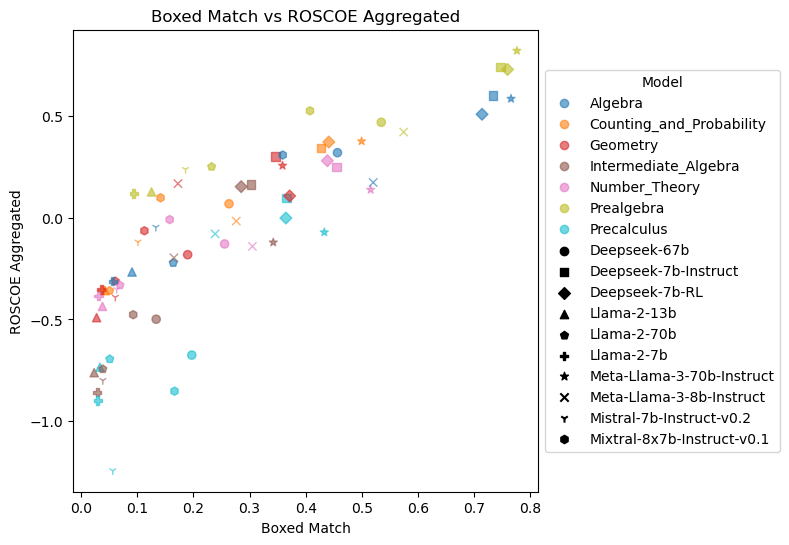

In [396]:
# plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
#                                roscoe_grouped.groupby('model').mean()['perplexity_step_max'], 'Boxed Match', 'ROSCOE Perplexity Step Max')
# 
# plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], roscoe_grouped['perplexity_step_max'],
#                                            'Boxed Match', 'ROSCOE Perplexity Step Max')

plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
                               roscoe_grouped.groupby('model').mean()['ROSCOE_aggregated'], 'Boxed Match',
                               'ROSCOE Aggregated')

plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], roscoe_grouped['ROSCOE_aggregated'],
                                           'Boxed Match', 'ROSCOE Aggregated')

In [224]:
roscoe_grouped.columns

Index(['faithfulness', 'informativeness_step', 'informativeness_chain',
       'faithfulness_ww', 'repetition_word', 'repetition_step',
       'reasoning_alignment', 'external_hallucination', 'redundancy',
       'common_sense_error', 'missing_step', 'semantic_coverage_step',
       'semantic_coverage_chain', 'discourse_representation',
       'coherence_step_vs_step', 'perplexity_step', 'perplexity_chain',
       'perplexity_step_max', 'grammar_step', 'ROSCOE_SA', 'ROSCOE_SS',
       'ROSCOE_LI', 'ROSCOE_LC', 'ROSCOE', 'ROSCOE_supervised',
       'ROSCOE_unsupervised'],
      dtype='object')

In [409]:
# try to predict boxed match from roscoe using linear model with L1 regularization
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

model = Lasso(alpha=0.0005)
# drop all columns that contain 'ROSCOE_aggregated'
roscoe_grouped = roscoe_grouped.drop(columns=[c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' in c], errors='ignore')


# X_train = roscoe_grouped.iloc[:len(boxed_match_grouped) // 4]
# y_train = boxed_match_grouped[:len(boxed_match_grouped) // 4]['boxed_match']
# 
# X_test = roscoe_grouped.iloc[len(boxed_match_grouped) // 4:]
# y_test = boxed_match_grouped[len(boxed_match_grouped) // 4:]['boxed_match']

def split_by_datasets(df, datasets):
    return df.query('dataset in @datasets'), df.query('dataset not in @datasets')


# split_datasets = ['Algebra_train', 'Number_Theory_train', 'Counting_and_Probability_train', 'Geometry_train', 'Prealgebra_train', 'Precalculus_train', 'Intermediate_Algebra_train']
split_datasets = ['Prealgebra_train']

X_train, X_test = split_by_datasets(roscoe_grouped, split_datasets)
y_train, y_test = split_by_datasets(boxed_match_grouped, split_datasets)

y_train = y_train['boxed_match']
y_test = y_test['boxed_match']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print(f'Train score: {model.score(X_train, y_train):.3f}')
print(f'Test score: {model.score(X_test, y_test):.3f}')
# get coefficients
coefficients = pd.Series(model.coef_, index=X_train.columns)
coefficients

Train score: 0.838
Test score: -6.135


faithfulness               -8.022408
informativeness_step       -0.000000
informativeness_chain      -0.000000
faithfulness_ww            -0.000000
repetition_word            -1.161075
repetition_step            -0.000000
reasoning_alignment        -0.000000
external_hallucination     -0.000000
redundancy                 -0.000000
common_sense_error          0.000000
missing_step                0.000000
semantic_coverage_step     -0.000000
semantic_coverage_chain    -0.000000
discourse_representation   -0.000000
coherence_step_vs_step     -0.905396
perplexity_step            -2.473075
perplexity_chain           -6.553811
perplexity_step_max        -0.000000
grammar_step                0.000000
ROSCOE_SA                  -0.000000
ROSCOE_SS                  -0.000000
ROSCOE_LI                  -0.000000
ROSCOE_LC                  -0.000000
ROSCOE                     -0.000000
ROSCOE_supervised          -0.000000
ROSCOE_unsupervised        -0.000000
dtype: float64

In [285]:
[x for x in model.coef_]

[-2.1386594109102757,
 -0.0,
 -4.658621586672356,
 -0.0,
 -1.5772208159191115,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -8.745627038326795,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0]

In [410]:
# compute aggregated roscoe using coeff from lasso
roscoe_grouped = roscoe_grouped.drop(columns='ROSCOE_aggregated', errors='ignore')
import numpy as np

# model.coef_ = np.array([
#     -3.0,
#     0.0,
#     -2.0,
#     0.0,
#     0.0,
#     1.0,
#     0.0,
#     0.0,
#     -1.5,
#     0.0,
#     7.5,
#     0.0,
#     0.0,
#     0.5,
#     -0.5,
#     -1.0,
#     -3.0,
#     0.0,
#     3.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0
# ])

# model.coef_ = np.array([
#     -3.0,
#     -0.0,
#     -1.0,
#     -0.0,
#     0.0,
#     0.2,
#     -0.0,
#     -0.0,
#     -0.0,
#     0.0,
#     5.5,
#     -0.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -3.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -0.0])
roscoe_grouped['ROSCOE_aggregated'] = model.predict(roscoe_grouped)
roscoe_grouped.head()

faithfulness  \
model        dataset                                        
Deepseek-67b Algebra_train                       0.851666   
             Counting_and_Probability_train      0.836078   
             Geometry_train                      0.833386   
             Intermediate_Algebra_train          0.852190   
             Number_Theory_train                 0.842366   

                                             informativeness_step  \
model        dataset                                                
Deepseek-67b Algebra_train                               0.880366   
             Counting_and_Probability_train              0.862426   
             Geometry_train                              0.856417   
             Intermediate_Algebra_train                  0.880011   
             Number_Theory_train                         0.876977   

                                             informativeness_chain  \
model        dataset                                                 
Deepseek-67b Algebra_train                                0.963489   
             Counting_and_Probability_train               0.954090   
             Geometry_train                               0.946108   
             Intermediate_Algebra_train                   0.959876   
             Number_Theory_train                          0.959346   

                                             faithfulness_ww  repetition_word  \
model        dataset                                                            
Deepseek-67b Algebra_train                          0.936588         0.141722   
             Counting_and_Probability_train         0.928996         0.077718   
             Geometry_train                         0.920846         0.063446   
             Intermediate_Algebra_train             0.925100         0.290010   
             Number_Theory_train                    0.929124         0.089624   

                                             repetition_step  \
model        dataset                                           
Deepseek-67b Algebra_train                          0.150064   
             Counting_and_Probability_train         0.088374   
             Geometry_train                         0.078929   
             Intermediate_Algebra_train             0.304949   
             Number_Theory_train                    0.095117   

                                             reasoning_alignment  \
model        dataset                                               
Deepseek-67b Algebra_train                              0.877172   
             Counting_and_Probability_train             0.867869   
             Geometry_train                             0.850910   
             Intermediate_Algebra_train                 0.873834   
             Number_Theory_train                        0.867759   

                                             external_hallucination  \
model        dataset                                                  
Deepseek-67b Algebra_train                                 0.951896   
             Counting_and_Probability_train                0.947443   
             Geometry_train                                0.941875   
             Intermediate_Algebra_train                    0.953568   
             Number_Theory_train                           0.948233   

                                             redundancy  common_sense_error  \
model        dataset                                                          
Deepseek-67b Algebra_train                     0.805892            0.966111   
             Counting_and_Probability_train    0.798223            0.957294   
             Geometry_train                    0.777312            0.952832   
             Intermediate_Algebra_train        0.815937            0.959376   
             Number_Theory_train               0.796193            0.953259   

                                             ...  perplexity_step_max  \
model        dataset   

In [418]:
len([c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' not in c and 'ROSCOE' not in c])

19

In [413]:
def fit_roscoe_on_dataset(datasets, roscoe_grouped):
    if not isinstance(datasets, list):
        datasets = [datasets]
    
    allowed_columns = [c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' not in c]
    
    X_train, X_test = split_by_datasets(roscoe_grouped[allowed_columns], datasets)
    y_train, y_test = split_by_datasets(boxed_match_grouped, datasets)

    y_train = y_train['boxed_match']
    y_test = y_test['boxed_match']

    model.fit(X_train, y_train)
    print(f'{dataset} Train score: {model.score(X_train, y_train):.3f}')
    print(f'{dataset} Test score: {model.score(X_test, y_test):.3f}')
    name = '_'.join(datasets)
    roscoe_grouped[f'ROSCOE_aggregated_{name}'] = model.predict(roscoe_grouped[allowed_columns])
    return roscoe_grouped


for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
    roscoe_grouped = fit_roscoe_on_dataset(dataset, roscoe_grouped)

Algebra_train Train score: 0.822
Algebra_train Test score: -3.620
Counting_and_Probability_train Train score: 0.726
Counting_and_Probability_train Test score: -0.104
Geometry_train Train score: 0.663
Geometry_train Test score: -0.450
Intermediate_Algebra_train Train score: 0.735
Intermediate_Algebra_train Test score: 0.292
Number_Theory_train Train score: 0.696
Number_Theory_train Test score: -1.001
Prealgebra_train Train score: 0.838
Prealgebra_train Test score: -6.135
Precalculus_train Train score: 0.845
Precalculus_train Test score: -1.848


In [369]:
roscoe_grouped.head()

faithfulness  \
model        dataset                                        
Deepseek-67b Algebra_train                       0.851666   
             Counting_and_Probability_train      0.836078   
             Geometry_train                      0.833386   
             Intermediate_Algebra_train          0.852190   
             Number_Theory_train                 0.842366   

                                             informativeness_step  \
model        dataset                                                
Deepseek-67b Algebra_train                               0.880366   
             Counting_and_Probability_train              0.862426   
             Geometry_train                              0.856417   
             Intermediate_Algebra_train                  0.880011   
             Number_Theory_train                         0.876977   

                                             informativeness_chain  \
model        dataset                                                 
Deepseek-67b Algebra_train                                0.963489   
             Counting_and_Probability_train               0.954090   
             Geometry_train                               0.946108   
             Intermediate_Algebra_train                   0.959876   
             Number_Theory_train                          0.959346   

                                             faithfulness_ww  repetition_word  \
model        dataset                                                            
Deepseek-67b Algebra_train                          0.936588         0.141722   
             Counting_and_Probability_train         0.928996         0.077718   
             Geometry_train                         0.920846         0.063446   
             Intermediate_Algebra_train             0.925100         0.290010   
             Number_Theory_train                    0.929124         0.089624   

                                             repetition_step  \
model        dataset                                           
Deepseek-67b Algebra_train                          0.150064   
             Counting_and_Probability_train         0.088374   
             Geometry_train                         0.078929   
             Intermediate_Algebra_train             0.304949   
             Number_Theory_train                    0.095117   

                                             reasoning_alignment  \
model        dataset                                               
Deepseek-67b Algebra_train                              0.877172   
             Counting_and_Probability_train             0.867869   
             Geometry_train                             0.850910   
             Intermediate_Algebra_train                 0.873834   
             Number_Theory_train                        0.867759   

                                             external_hallucination  \
model        dataset                                                  
Deepseek-67b Algebra_train                                 0.951896   
             Counting_and_Probability_train                0.947443   
             Geometry_train                                0.941875   
             Intermediate_Algebra_train                    0.953568   
             Number_Theory_train                           0.948233   

                                             redundancy  common_sense_error  \
model        dataset                                                          
Deepseek-67b Algebra_train                     0.805892            0.966111   
             Counting_and_Probability_train    0.798223            0.957294   
             Geometry_train                    0.777312            0.952832   
             Intermediate_Algebra_train        0.815937            0.959376   
             Number_Theory_train               0.796193            0.953259   

                                             ...  \
model        dataset                        

In [414]:
# calculation correlation between boxed_match and roscoe agg for each dataset and aggregated roscoe
# rows are dataset that roscoe is trained on, columns are dataset that roscoe is tested on
corrs = pd.DataFrame(index=boxed_match_grouped.index.get_level_values('dataset').unique(),
                     columns=boxed_match_grouped.index.get_level_values('dataset').unique())

for dataset_train in boxed_match_grouped.index.get_level_values('dataset').unique():
    for dataset_test in boxed_match_grouped.index.get_level_values('dataset').unique():
        boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset_test}"')['boxed_match']
        roscoe_dataset = roscoe_grouped.query(f'dataset == "{dataset_test}"')[f'ROSCOE_aggregated_{dataset_train}']

        correlation = boxed_match_dataset.corr(roscoe_dataset)
        corrs.loc[dataset_train, dataset_test] = correlation

# for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
#     boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset}"')['boxed_match']
#     xcomet_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')['ROSCOE_aggregated']
# 
#     correlation = boxed_match_dataset.corr(xcomet_dataset)
#     
#     print(f'{dataset}:\n{correlation:.3f}')


In [383]:
corrs.loc['Precalculus_train']

dataset
Algebra_train                     0.899493
Counting_and_Probability_train    0.906905
Geometry_train                    0.865965
Intermediate_Algebra_train        0.903343
Number_Theory_train               0.883443
Prealgebra_train                  0.945525
Precalculus_train                 0.954634
Name: Precalculus_train, dtype: object

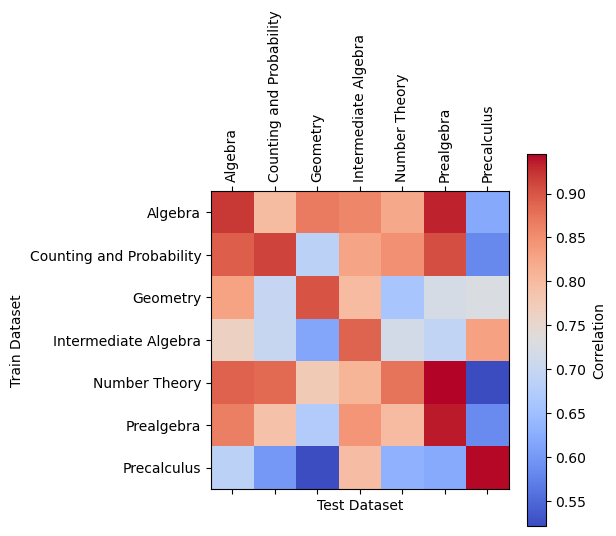

In [419]:
plt.matshow(corrs.astype(float), cmap='coolwarm')
xlabels = [d.replace('_train', '').replace('_', ' ') for d in corrs.columns]
ylabels = [d.replace('_train', '').replace('_', ' ') for d in corrs.index]
plt.xticks(range(len(corrs.columns)), xlabels, rotation=90)
plt.yticks(range(len(corrs.index)), ylabels)
plt.colorbar(
    label='Correlation'
)
plt.xlabel('Test Dataset')
plt.ylabel('Train Dataset')
plt.show()